<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [4]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = dataset

In [11]:
df.shape

(284807, 31)

In [8]:
df.isnull().sum().any()

False

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
target = df.Class
vc = target.value_counts()

In [24]:
fig, axs = plt.subplots()

array([284315,    492], dtype=int64)

In [ ]:
sns.barplot(x=vc.values, y=vc.index.values, orient='hor')

In [30]:
vc[0], vc[1]

(284315, 492)

In [35]:
amount = df['Amount']
df.groupby('Class')[['Amount']].sum()

,Amount
Class,
0,25102462.04
1,60127.97


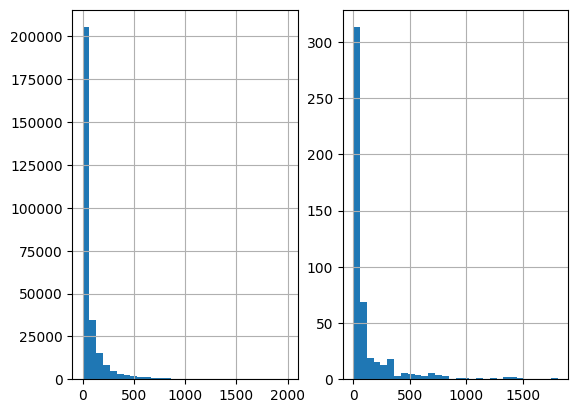

In [55]:
fig, axs = plt.subplots(1, 2)
axs = axs.flat
for gr in df[['Amount', 'Class']][df['Amount'] < 2000].groupby('Class'):
    gr[1]['Amount'].hist(ax=axs[gr[0]], bins=30)

In [ ]:
sns.barplot(x=)

In [ ]:
df.hist(figsize=(15, 15))

In [ ]:
col = [col for col in df.columns if col != 'Time']
col

In [ ]:
fig, axs = plt.subplots(3, 10)
fig.set_size_inches(15, 15)
axs = axs.flat
indx = 0
for k, v in df[col].items():
    sns.boxplot(v, ax=axs[indx])
    indx += 1
plt.tight_layout(pad=1, h_pad=7, w_pad = 0.5)

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlGn')
plt.gcf().set_size_inches((15,15))

In [93]:
cor_df = df.corr().round(2)
cor_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


In [92]:
cor_t = cor_df.where(np.triu(np.ones(cor_df.shape, dtype=np.bool_), k=1))

In [103]:
corr_col = cor_df[cor_df['Class'].abs() > 0.2].drop('Class').index.values

In [104]:
corr_col

array(['V10', 'V12', 'V14', 'V17'], dtype=object)

In [106]:
x = df[corr_col]
y = df['Class']


In [8]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y)

In [10]:
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression().fit(x_train, y_train)

In [15]:
from sklearn.metrics import mean_squared_error, log_loss, roc_curve, roc_auc_score
# predict = model.predict(x_test)
# roc_curve()

In [ ]:
classification_report

In [11]:
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LogisticRegression().fit(x_train, y_train)


In [14]:
pos_p = model.predict_proba(x_test)[:, 1]

In [16]:
roc_auc_score(y_test, pos_p)

0.9134756152576724

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, pos_p)

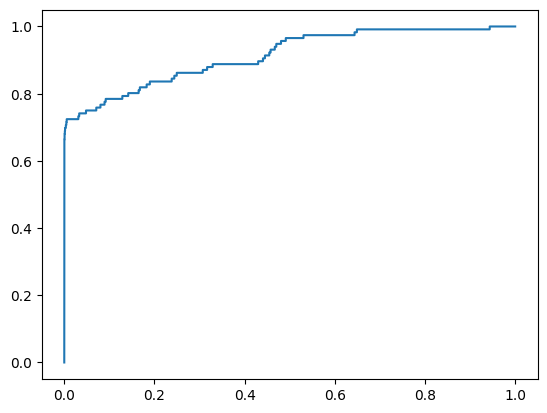

In [21]:
plt.plot(fpr, tpr)

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = df[corr_col]
y = df['Class']
x = scaler.fit_transform(x)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LogisticRegression().fit(x_train, y_train)
predict = model.predict(x_test)
log_loss(y_test, predict)

0.03298564634744627

In [128]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, n_estimators=10)

In [129]:
x = df.drop('Class', axis=1)
y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [130]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [131]:
predict = model.predict(x_test)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.94      0.84      0.89       113

    accuracy                           1.00     71202
   macro avg       0.97      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [136]:
model.feature_importances_

array([0.01094544, 0.01358242, 0.01761117, 0.01408755, 0.02220065,
       0.00801966, 0.02012992, 0.02218193, 0.01333468, 0.05636188,
       0.04446359, 0.05211091, 0.20595976, 0.01225367, 0.13527402,
       0.01044109, 0.03408079, 0.1465885 , 0.01524816, 0.01742981,
       0.01801128, 0.01145279, 0.00604484, 0.00641799, 0.00858078,
       0.01367065, 0.03138588, 0.00954348, 0.00906188, 0.01352485])

In [137]:
from sklearn.decomposition import PCA
pca = PCA(3)
x_principal_comp = pca.fit_transform(x)

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [140]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [141]:
predict = model.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71076
           1       0.94      0.82      0.87       126

    accuracy                           1.00     71202
   macro avg       0.97      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [157]:
from sklearn.metrics import accuracy_score
sum_score = 0
part = x.shape[0] // 2
for i in range(2):
    st_test = i * part
    end_test = (i + 1) * part
    x_test = x[st_test : end_test]
    x_train = x.drop(x_test.index.values)
    y_test = y[st_test : end_test]
    y_train = y.drop(x_test.index.values)
    model.fit(x_train, y_train)
    sum_score += accuracy_score(y_test, model.predict(x_test))
sum_score // 2

0.0

In [ ]:
model.feature_importances_

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [ ]:
from sklearn import metrics

part = len(shuffled)//10

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

mean_score = 0
for i in range(10):
    test = shuffled[i*part:(i+1)*part]
    train = shuffled.drop(shuffled.index[i*part:(i+1)*part])
    # обучаем модель
    train_x = train.drop(['target'], axis=1)
    train_y = train.target
    test_x = test.drop(['target'], axis=1)
    test_y = test.target
    model.fit(train_x, train_y)

    model_pred = model.predict(test_x)
    mean_score += metrics.accuracy_score(test_y, model_pred)
    
print(mean_score/10)

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
x_train, y_train = RandomOverSampler().fit_resample(x_train, y_train)
y_train

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x_resambled, y_resampled, test_size=0.2)

In [168]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [163]:
accuracy_score(y_test, model.predict(x_test))

0.9999384485517824

In [1]:
print(classification_report(y_test, model.predict(x_test)))

NameError: name 'classification_report' is not defined

In [ ]:
model.feature_importances_

**1. Загрузить датасет**

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

**5. Построить графики histograms для всех значений**

**6. Построить матрицу корреляций для всех значений**

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [ ]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

Как делать classification report:

In [ ]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**


**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**
